# Mini Project Part A

This is a template for Part A of your project. You are provided with the code to load the data.

For each task you need to write code in the 'Code' cell and answer the question in the 'Markdown' cell. There is a word limit to discourage lengthy commentaries. Be brief and clear.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

(433, 90, 90)


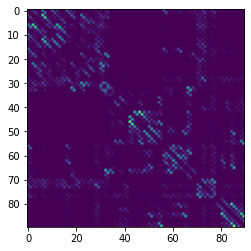

In [59]:
# load connectivity matrices
import pickle
matrices = pickle.load( open( "data/matrices.p", "rb" ) )
print(matrices.shape)
plt.imshow(matrices[0,:,:])

In [60]:
# convert upper triangles of the matrices to feature vectors

# dimensions
n = matrices.shape[0]
m = matrices.shape[1]

D = round(m*(m-1)/2)
print('n={}, D={}'.format(n,D))

# feature matrix
X=np.zeros([n,D])
for i in range(n):
    index=0
    for j in range(m):
        for k in range(j):
            X[i,index]=matrices[i,j,k]
            index=index+1
print(X.shape)
X

n=433, D=4005
(433, 4005)


array([[3.87819694e+02, 9.22048150e+03, 2.20766511e+02, ...,
        0.00000000e+00, 1.46054986e+04, 0.00000000e+00],
       [2.93423267e+02, 1.18512822e+04, 2.93676630e+02, ...,
        1.63412154e+00, 2.00579285e+04, 1.13951603e+00],
       [3.99800187e+02, 1.91983492e+04, 1.94759448e+02, ...,
        0.00000000e+00, 2.08952495e+04, 9.18198134e+00],
       ...,
       [1.00135770e+02, 1.21389333e+04, 4.37758515e+01, ...,
        0.00000000e+00, 2.02913541e+04, 1.69532150e-01],
       [1.99100354e+02, 1.08341242e+04, 1.98052999e+02, ...,
        0.00000000e+00, 1.26711587e+04, 6.12328380e-01],
       [1.64046676e+02, 1.04941706e+04, 1.36394112e+02, ...,
        1.92881629e-01, 1.59131950e+04, 7.15969056e-01]])

In [61]:
# load subject info
subject_info = pd.read_csv('data/subject_info.csv')

In [62]:
# load gray matter region descriptions - you will need this in Part B
# don't worry about the labels for now - there are here only to help you understand the dataset
label_names = pd.read_csv('data/label_names.csv')
label_names

,Label,Region name,Region description
0,1,Precentral_L,Precental gyrus
1,2,Precentral_R,Precental gyrus
2,3,Frontal_Sup_L,"Superior frontal gyrus, dorsolateral"
3,4,Frontal_Sup_R,"Superior frontal gyrus, dorsolateral"
4,5,Frontal_Sup_Orb_L,"Superior frontal gyrus, orbital part"
...,...,...,...
85,86,Temporal_Mid_R,Middle temporal gyrus
86,87,Temporal_Pole_Mid_L,Temporal pole: middle temporal gyrus
87,88,Temporal_Pole_Mid_R,Temporal pole: middle temporal gyrus
88,89,Temporal_Inf_L,Inferior temporal gyrus


In [63]:
label_names.isnull().values.any()

False

## Preprocessing

**7 marks**

Your task is to predict prematurity from the connectivity features. Include code that prepares your data for training of your classifier.

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
def normalize(dataset,a,b):
    scaler = MinMaxScaler(feature_range=(a,b))
    normalize_data = scaler.fit_transform(dataset)
    return normalize_data

In [66]:
X = normalize(X,-1,1)

In [67]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,3995,3996,3997,3998,3999,4000,4001,4002,4003,4004
0,-0.775352,-0.663391,-0.637646,-0.786892,-0.701621,-0.669462,-0.449379,-0.509170,-0.308397,-0.638171,...,-0.683329,-0.901619,-0.402270,-1.000000,-0.401976,-1.000000,-0.080683,-1.000000,-0.439991,-1.000000
1,-0.835909,-0.383632,-0.504378,-0.847760,-0.519059,-0.541640,-0.598797,-0.232701,-0.282186,0.484251,...,-0.232697,-0.859637,0.123587,-1.000000,-0.122510,-0.963178,0.176613,-0.031532,-0.019420,-0.891659
2,-0.767666,0.397655,-0.685183,-0.850310,0.026200,-0.621503,-0.159228,-0.519636,-0.540725,-0.528554,...,-0.896461,0.155829,-0.259878,-0.527878,-0.080967,-0.614867,0.276194,-1.000000,0.045166,-0.127012
3,-0.471392,-0.348532,-0.333411,-0.795202,-0.508763,-0.242388,-0.693831,-0.408059,-0.088292,-0.428832,...,-0.797755,-0.704598,-0.195291,-0.830314,-0.635974,-0.946681,0.178398,-1.000000,-0.492266,-0.747022
4,-0.777921,0.212845,-0.513166,-0.544464,0.230143,-0.212116,0.290527,-0.905986,-0.645765,-0.248133,...,-0.475228,-0.892808,-0.081158,-1.000000,-0.598620,-1.000000,0.189785,-0.847892,-0.490914,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,-0.912200,-0.201006,-0.820986,-0.834356,-0.317826,-0.764450,-0.780748,-0.387096,-0.149249,-0.449190,...,-0.913831,-0.966037,-0.784450,-0.841449,-0.204988,-0.946860,-0.012560,-1.000000,-0.408666,-0.951028
429,-0.558071,0.718696,-0.344516,-0.440013,0.139575,-0.041048,-0.295213,-0.832659,-0.057631,-0.376309,...,-0.947993,-0.881062,-0.582569,-1.000000,-0.103108,-0.940350,0.022990,-1.000000,-0.087196,-1.000000
430,-0.959907,-0.353043,-0.961156,-0.930274,-0.279927,-0.928072,-1.000000,-1.000000,1.000000,-1.000000,...,-0.966268,-1.000000,-0.718138,-0.965657,0.410763,-1.000000,0.359025,-1.000000,-0.001415,-0.983882
431,-0.896419,-0.491796,-0.679163,-0.805703,-0.008016,-0.472977,-0.405945,-0.803969,-0.037735,-0.794617,...,-0.761016,-0.915978,-0.483867,-1.000000,-0.605737,-1.000000,-0.196190,-1.000000,-0.589195,-0.941782


In [68]:
arr = []
for i in range(0,4005):
    arr.append('char{}'.format(i))
X = pd.DataFrame(X)
X.columns = arr
X

,char0,char1,char2,char3,char4,char5,char6,char7,char8,char9,...,char3995,char3996,char3997,char3998,char3999,char4000,char4001,char4002,char4003,char4004
0,-0.775352,-0.663391,-0.637646,-0.786892,-0.701621,-0.669462,-0.449379,-0.509170,-0.308397,-0.638171,...,-0.683329,-0.901619,-0.402270,-1.000000,-0.401976,-1.000000,-0.080683,-1.000000,-0.439991,-1.000000
1,-0.835909,-0.383632,-0.504378,-0.847760,-0.519059,-0.541640,-0.598797,-0.232701,-0.282186,0.484251,...,-0.232697,-0.859637,0.123587,-1.000000,-0.122510,-0.963178,0.176613,-0.031532,-0.019420,-0.891659
2,-0.767666,0.397655,-0.685183,-0.850310,0.026200,-0.621503,-0.159228,-0.519636,-0.540725,-0.528554,...,-0.896461,0.155829,-0.259878,-0.527878,-0.080967,-0.614867,0.276194,-1.000000,0.045166,-0.127012
3,-0.471392,-0.348532,-0.333411,-0.795202,-0.508763,-0.242388,-0.693831,-0.408059,-0.088292,-0.428832,...,-0.797755,-0.704598,-0.195291,-0.830314,-0.635974,-0.946681,0.178398,-1.000000,-0.492266,-0.747022
4,-0.777921,0.212845,-0.513166,-0.544464,0.230143,-0.212116,0.290527,-0.905986,-0.645765,-0.248133,...,-0.475228,-0.892808,-0.081158,-1.000000,-0.598620,-1.000000,0.189785,-0.847892,-0.490914,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,-0.912200,-0.201006,-0.820986,-0.834356,-0.317826,-0.764450,-0.780748,-0.387096,-0.149249,-0.449190,...,-0.913831,-0.966037,-0.784450,-0.841449,-0.204988,-0.946860,-0.012560,-1.000000,-0.408666,-0.951028
429,-0.558071,0.718696,-0.344516,-0.440013,0.139575,-0.041048,-0.295213,-0.832659,-0.057631,-0.376309,...,-0.947993,-0.881062,-0.582569,-1.000000,-0.103108,-0.940350,0.022990,-1.000000,-0.087196,-1.000000
430,-0.959907,-0.353043,-0.961156,-0.930274,-0.279927,-0.928072,-1.000000,-1.000000,1.000000,-1.000000,...,-0.966268,-1.000000,-0.718138,-0.965657,0.410763,-1.000000,0.359025,-1.000000,-0.001415,-0.983882
431,-0.896419,-0.491796,-0.679163,-0.805703,-0.008016,-0.472977,-0.405945,-0.803969,-0.037735,-0.794617,...,-0.761016,-0.915978,-0.483867,-1.000000,-0.605737,-1.000000,-0.196190,-1.000000,-0.589195,-0.941782


**Describe what you have done and why [max 50 words]:**
通过sklearn中的MinMaxScaler方法对数据进行预处理，将原始数据归一化在-1～1之间，方便后续随机森林模型的训练

## Analysis of the dataset
**18 marks**

Print out important characeristics of the dataset to understand the problem. Visualise the dataset. (*Hint: You can use PCA for visualisation*)

In [69]:
ano_label = np.column_stack((subject_info["age"],subject_info["prematurity"],X))
ano_label.shape

(433, 4007)

In [70]:
arr_sub = ['age','prematurity']
arr = arr_sub+arr
len(arr)

4007

In [71]:
df = pd.DataFrame(ano_label,columns=arr)
df

,age,prematurity,char0,char1,char2,char3,char4,char5,char6,char7,...,char3995,char3996,char3997,char3998,char3999,char4000,char4001,char4002,char4003,char4004
0,41.0,0.0,-0.775352,-0.663391,-0.637646,-0.786892,-0.701621,-0.669462,-0.449379,-0.509170,...,-0.683329,-0.901619,-0.402270,-1.000000,-0.401976,-1.000000,-0.080683,-1.000000,-0.439991,-1.000000
1,41.0,0.0,-0.835909,-0.383632,-0.504378,-0.847760,-0.519059,-0.541640,-0.598797,-0.232701,...,-0.232697,-0.859637,0.123587,-1.000000,-0.122510,-0.963178,0.176613,-0.031532,-0.019420,-0.891659
2,40.0,0.0,-0.767666,0.397655,-0.685183,-0.850310,0.026200,-0.621503,-0.159228,-0.519636,...,-0.896461,0.155829,-0.259878,-0.527878,-0.080967,-0.614867,0.276194,-1.000000,0.045166,-0.127012
3,41.0,0.0,-0.471392,-0.348532,-0.333411,-0.795202,-0.508763,-0.242388,-0.693831,-0.408059,...,-0.797755,-0.704598,-0.195291,-0.830314,-0.635974,-0.946681,0.178398,-1.000000,-0.492266,-0.747022
4,41.0,0.0,-0.777921,0.212845,-0.513166,-0.544464,0.230143,-0.212116,0.290527,-0.905986,...,-0.475228,-0.892808,-0.081158,-1.000000,-0.598620,-1.000000,0.189785,-0.847892,-0.490914,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,44.0,0.0,-0.912200,-0.201006,-0.820986,-0.834356,-0.317826,-0.764450,-0.780748,-0.387096,...,-0.913831,-0.966037,-0.784450,-0.841449,-0.204988,-0.946860,-0.012560,-1.000000,-0.408666,-0.951028
429,41.0,0.0,-0.558071,0.718696,-0.344516,-0.440013,0.139575,-0.041048,-0.295213,-0.832659,...,-0.947993,-0.881062,-0.582569,-1.000000,-0.103108,-0.940350,0.022990,-1.000000,-0.087196,-1.000000
430,44.0,0.0,-0.959907,-0.353043,-0.961156,-0.930274,-0.279927,-0.928072,-1.000000,-1.000000,...,-0.966268,-1.000000,-0.718138,-0.965657,0.410763,-1.000000,0.359025,-1.000000,-0.001415,-0.983882
431,42.0,0.0,-0.896419,-0.491796,-0.679163,-0.805703,-0.008016,-0.472977,-0.405945,-0.803969,...,-0.761016,-0.915978,-0.483867,-1.000000,-0.605737,-1.000000,-0.196190,-1.000000,-0.589195,-0.941782


In [72]:
df.loc[(df.prematurity==0),'points'] = 'virginica'
df.loc[(df.prematurity==1),'points'] = 'setosa'

In [73]:
df

,age,prematurity,char0,char1,char2,char3,char4,char5,char6,char7,...,char3996,char3997,char3998,char3999,char4000,char4001,char4002,char4003,char4004,points
0,41.0,0.0,-0.775352,-0.663391,-0.637646,-0.786892,-0.701621,-0.669462,-0.449379,-0.509170,...,-0.901619,-0.402270,-1.000000,-0.401976,-1.000000,-0.080683,-1.000000,-0.439991,-1.000000,virginica
1,41.0,0.0,-0.835909,-0.383632,-0.504378,-0.847760,-0.519059,-0.541640,-0.598797,-0.232701,...,-0.859637,0.123587,-1.000000,-0.122510,-0.963178,0.176613,-0.031532,-0.019420,-0.891659,virginica
2,40.0,0.0,-0.767666,0.397655,-0.685183,-0.850310,0.026200,-0.621503,-0.159228,-0.519636,...,0.155829,-0.259878,-0.527878,-0.080967,-0.614867,0.276194,-1.000000,0.045166,-0.127012,virginica
3,41.0,0.0,-0.471392,-0.348532,-0.333411,-0.795202,-0.508763,-0.242388,-0.693831,-0.408059,...,-0.704598,-0.195291,-0.830314,-0.635974,-0.946681,0.178398,-1.000000,-0.492266,-0.747022,virginica
4,41.0,0.0,-0.777921,0.212845,-0.513166,-0.544464,0.230143,-0.212116,0.290527,-0.905986,...,-0.892808,-0.081158,-1.000000,-0.598620,-1.000000,0.189785,-0.847892,-0.490914,-1.000000,virginica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,44.0,0.0,-0.912200,-0.201006,-0.820986,-0.834356,-0.317826,-0.764450,-0.780748,-0.387096,...,-0.966037,-0.784450,-0.841449,-0.204988,-0.946860,-0.012560,-1.000000,-0.408666,-0.951028,virginica
429,41.0,0.0,-0.558071,0.718696,-0.344516,-0.440013,0.139575,-0.041048,-0.295213,-0.832659,...,-0.881062,-0.582569,-1.000000,-0.103108,-0.940350,0.022990,-1.000000,-0.087196,-1.000000,virginica
430,44.0,0.0,-0.959907,-0.353043,-0.961156,-0.930274,-0.279927,-0.928072,-1.000000,-1.000000,...,-1.000000,-0.718138,-0.965657,0.410763,-1.000000,0.359025,-1.000000,-0.001415,-0.983882,virginica
431,42.0,0.0,-0.896419,-0.491796,-0.679163,-0.805703,-0.008016,-0.472977,-0.405945,-0.803969,...,-0.915978,-0.483867,-1.000000,-0.605737,-1.000000,-0.196190,-1.000000,-0.589195,-0.941782,virginica


In [74]:
# count red and green
df["points"].value_counts()

virginica    346
setosa        87
Name: points, dtype: int64

In [75]:
# check data has any values null/nan or not
subject_info["prematurity"].isnull().values.any()

False

In [76]:
import plotly.express as px
from sklearn.decomposition import PCA

In [77]:
X = X[['char0','char1','char2','char10','char1000']]

In [78]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

In [79]:
fig = px.scatter(components, x=0, y=1,color=df['points']) 
fig.show()

**Describe the challenges of succesfully fitting a classifier to this dataset [max 100 words]:**
本案例采用随机森林算法模型，训练过程中需要通过GridSearchCV方法查找几个超参数的最优值，如n_estimators、max_features等，并对随机森林模型进行修改，使模型得分最高！

## Evaluation framework

**15 marks**

Include code and functions to prepare the framework for evaluation of your machine learning models. Think of different sets of data and performance measures that you will need to analyse the performance of your classifier. Make sure you
* display (plot) the sets of data that you created (*Hint: you can use PCA*)
* write functions to evaluate performance on each of the sets later on (*Hint: you will need different functions for different sets of data*)

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [81]:
# different sets
data = df
data = data.drop(['prematurity','points'],axis=1)
X = data.values
y = df['prematurity'].values

In [82]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [83]:
Xtrain.shape,ytrain.shape

((324, 4006), (324,))

In [84]:
Xtest.shape,ytest.shape

((109, 4006), (109,))

In [85]:
pca = PCA()
components = pca.fit_transform(Xtrain)
fig = px.scatter(components, x=0, y=1)
fig.show()

In [86]:
pca = PCA()
components = pca.fit_transform(Xtest)
fig = px.scatter(components, x=0, y=1)
fig.show()

**Explain the main features of your framework [max 100 words]:**
采用随机森林作为模型，引入随机性，可以有效避免过拟合，并且有很好的抗噪声能力，在不需要降维的情况下，即可处理高维数据，准确率极高

## Methods

**30 marks**

Train and tune your classifier. Use machine learning models that you learned in weeks 2-4. Make sure you print out the tuned parameters.

In [87]:
random_forest = RandomForestClassifier()
random_forest.fit(Xtrain,ytrain)

RandomForestClassifier()

In [88]:
# Train your classifier
param_test1 = {"n_estimators":range(1,101,10)}


gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,
                        scoring='roc_auc',cv=10)
gsearch1.fit(Xtrain,ytrain)


# Print out tuned parameters
print(gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

{'n_estimators': 91}
best accuracy:0.922678


In [89]:
param_test2 = {"max_features":range(1,11,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=81,
                        random_state=10),
                        param_grid = param_test2,scoring='roc_auc',cv=10)
gsearch1.fit(Xtrain,ytrain)
# Print out tuned parameters
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)

{'max_features': 6}
best accuracy:0.902441


In [90]:
rf0 = RandomForestClassifier(n_estimators=71,max_features=9,
                             oob_score=True,random_state=10)
rf0.fit(Xtrain,ytrain)
print(rf0.oob_score_)
print("accuracy: %f" % rf0.oob_score_)

0.8302469135802469
accuracy: 0.830247


**Describe the main features of your classifier and how they address the challenges you identified above [max 100 words]:**
采用随机森林作为算法模型，并痛过GridSearchCV方法寻找最优参数，结果表明，当n_estimators=91，max_features=6时，模型得分最高，值为83%

## Results
**30 marks**

Evaluate performance of your classifier.

In [91]:
# Your evaluation
y_pred = random_forest.predict(Xtest)
accuracy = random_forest.score(Xtest,ytest)
accuracy,y_pred

(0.8348623853211009,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]))

In [92]:
cross_val_score(random_forest,X,y,cv=5)

array([0.85057471, 0.82758621, 0.82758621, 0.8372093 , 0.8372093 ])

**Analyse the performance of the classifier [max 50 words]:**
模型最终得分为83%，在我们的实验中，共有109个标签数据，其中经过模型预测后有91个预测值与原始标签数据一致，模型精确度较高，但受限于计算机算力及对原始数据的处理能力，模型精确度还有一定提升空间

**Visualise the results using PCA.** For example, you can plot the data with their true labels in one plot and the predicted labels in the other.

In [93]:
# Plot results
Xtrain.shape,ytrain.shape
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [94]:
from collections import Counter

In [95]:
y_pred==ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True, False,
        True])

In [96]:
Counter(y_pred==ytest)[True],Counter(y_pred==ytest)[False]

(91, 18)

In [97]:
y_pred,ytest,Xtest

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 0., 0., 1., 0.]),
 array([[41.

In [98]:
y_pred.shape,ytest.shape,Xtest.shape

((109,), (109,), (109, 4006))

In [99]:
pca_data = np.column_stack((y_pred,ytest))

In [100]:
pca_data = pd.DataFrame(pca_data,columns=['Predictions','TrueLabels'])

In [101]:
pca_data

,Predictions,TrueLabels
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
104,0.0,0.0
105,0.0,0.0
106,0.0,0.0
107,0.0,1.0


In [102]:
pca_data.loc[(pca_data.Predictions==0),'color1'] = 'virginica'
pca_data.loc[(pca_data.Predictions==1),'color1'] = 'setosa'

In [103]:
pca_data

,Predictions,TrueLabels,color1
0,0.0,0.0,virginica
1,0.0,0.0,virginica
2,0.0,0.0,virginica
3,0.0,0.0,virginica
4,0.0,0.0,virginica
...,...,...,...
104,0.0,0.0,virginica
105,0.0,0.0,virginica
106,0.0,0.0,virginica
107,0.0,1.0,virginica


In [104]:
pca_data.loc[(pca_data.TrueLabels==0),'color2'] = 'virginica'
pca_data.loc[(pca_data.TrueLabels==1),'color2'] = 'setosa'

In [105]:
pca_data

,Predictions,TrueLabels,color1,color2
0,0.0,0.0,virginica,virginica
1,0.0,0.0,virginica,virginica
2,0.0,0.0,virginica,virginica
3,0.0,0.0,virginica,virginica
4,0.0,0.0,virginica,virginica
...,...,...,...,...
104,0.0,0.0,virginica,virginica
105,0.0,0.0,virginica,virginica
106,0.0,0.0,virginica,virginica
107,0.0,1.0,virginica,setosa


In [106]:
X = pca_data[['Predictions']]

In [107]:
pca = PCA(n_components=1)
components = pca.fit_transform(X)

fig = px.scatter(components,color=pca_data['color1'])
fig.show()

In [108]:
X1 = pca_data[['TrueLabels']]
pca = PCA(n_components=1)
components = pca.fit_transform(X)

fig = px.scatter(components,color=pca_data['color2'])
fig.show()